In [ ]:
!pip install statsmodels==0.14.0

  Using cached statsmodels-0.14.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.1 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 39.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

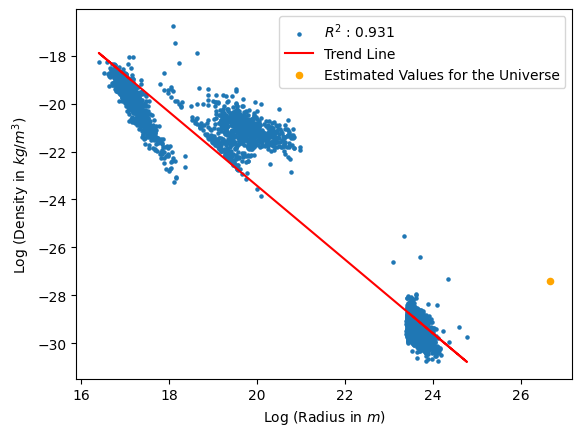

 
-1.542 x + 7.407
-1.1750195315276253
-1.1803991513693692
0.07435499493902877


In [ ]:
#og reg
df = pd.read_csv('../work/HSRA Research Sheets - Unified Databases.csv')

df = df.drop(df[df['PType'] == 'WD'].index)

df = df.drop(df[df['PType'] == 'NS'].index)
df = df.drop(df[df['PType'] == 'MS'].index)
df = df.drop(df[df['PType'] == 'P'].index)


df['density']=(df['Mass(Kg)'])/((df['Radius(m)']**3)*(4/3)*math.pi)
df['density'] = np.log10(df['density'])
df['radius'] = np.log10(df['Radius(m)'])

mean = np.mean(df['density']/df['radius'])
median = np.median(df['density']/df['radius'])
standdev = np.std(df['density']/df['radius'])

plt.scatter(df['radius'], df['density'], s=5)
plt.xlabel('Log (Radius in $m$)')
plt.ylabel('Log (Density in $kg/m^3$)')


z = np.polyfit(df['radius'], df['density'], 1)
p = np.poly1d(z)
plt.plot(df['radius'], p(df['radius']), color='r', label='Trend Line')
plt.scatter([np.log10(4.44654332211e26)], [np.log10(4.0732e-28)], s = 20, color = "orange", label="Universe Estimate")
y_pred = p(df['radius'])
y_mean = np.mean(df['density'])
ss_total = np.sum((df['density'] - y_mean) ** 2)
ss_residual = np.sum((df['density'] - y_pred) ** 2)
r_squared = np.round(1 - (ss_residual / ss_total), 3)
plt.legend(["$R^2$ : " +str(r_squared), 'Trend Line', 'Estimated Values for the Universe'])
plt.show()

print(p)
print(mean)
print(median)
print(standdev)

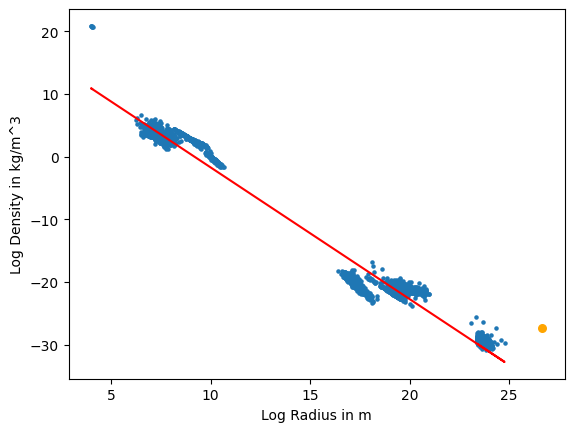

Linear Regression:
Linear Regression Statistics:
F-statistic: 418292.4068
P-value: 0.0000e+00
Degrees of Freedom (Model, Residual): (1.0, 6190.0)
Estimated Effect Size (Coefficient for 'radius'): -2.1027

Line Equation:
Log(Density) =  -2.1027 * Log(Radius)+19.3405


In [ ]:
#New reg all
df = pd.read_csv('../work/HSRA Research Sheets - Unified Databases.csv')

df.drop(df[df['PType'] == "WD"].index, inplace=True)

df['density'] = np.log10(df['Mass(Kg)'] / ((df['Radius(m)'] ** 3) * (4/3) * math.pi))
df['radius'] = np.log10(df['Radius(m)'])

plt.scatter(df['radius'], df['density'], s=5)
plt.xlabel('Log Radius in m')
plt.ylabel('Log Density in kg/m^3')

X_linear = sm.add_constant(df['radius'])
model_linear = sm.OLS(df['density'], X_linear).fit()

plt.plot(df['radius'], model_linear.predict(), color='r', label='Trend Line (Linear)')

plt.scatter([np.log10(4.44654332211e26)], [np.log10(4.0732e-28)], s=30, color="orange")

plt.show()

print("Linear Regression:")
f_statistic_linear = model_linear.fvalue
p_value_linear = model_linear.f_pvalue
degrees_of_freedom_linear = model_linear.df_model, model_linear.df_resid
effect_size_linear = model_linear.params['radius']

print("Linear Regression Statistics:")
print(f"F-statistic: {f_statistic_linear:.4f}")
print(f"P-value: {p_value_linear:.4e}")
print(f"Degrees of Freedom (Model, Residual): {degrees_of_freedom_linear}")
print(f"Estimated Effect Size (Coefficient for 'radius'): {effect_size_linear:.4f}")

print("\nLine Equation:")
print(f"Log(Density) =  {model_linear.params['radius']:.4f} * Log(Radius)+{model_linear.params['const']:.4f}")


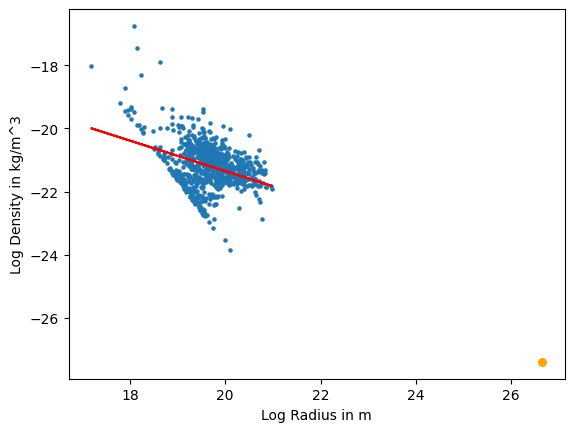

Linear Regression:
Linear Regression Statistics:
F-statistic: 124.5201
P-value: 5.7023e-27
Degrees of Freedom (Model, Residual): (1.0, 798.0)
Estimated Effect Size (Coefficient for 'radius'): -0.4816

Line Equation:
Log(Density) =  -0.4816 * Log(Radius)+-11.7172


In [ ]:
df = pd.read_csv('../work/HSRA Research Sheets - Galaxies.csv')

df['density']=((10**df['logM26'])*1.989e+30)/((((df['a26']/2)*3.086e+19)**3)*(4/3)*math.pi)

df['density'] = np.log10(df['density'])

df['radius'] = np.log10((df['a26']/2)*3.086e+19)

plt.scatter(df['radius'], df['density'], s=5)
plt.xlabel('Log Radius in m')
plt.ylabel('Log Density in kg/m^3')

X_linear = sm.add_constant(df['radius'])
model_linear = sm.OLS(df['density'], X_linear).fit()

plt.plot(df['radius'], model_linear.predict(), color='r', label='Trend Line (Linear)')

plt.scatter([np.log10(4.44654332211e26)], [np.log10(4.0732e-28)], s=30, color="orange")

plt.show()

print("Linear Regression:")
f_statistic_linear = model_linear.fvalue
p_value_linear = model_linear.f_pvalue
degrees_of_freedom_linear = model_linear.df_model, model_linear.df_resid
effect_size_linear = model_linear.params['radius']

print("Linear Regression Statistics:")
print(f"F-statistic: {f_statistic_linear:.4f}")
print(f"P-value: {p_value_linear:.4e}")
print(f"Degrees of Freedom (Model, Residual): {degrees_of_freedom_linear}")
print(f"Estimated Effect Size (Coefficient for 'radius'): {effect_size_linear:.4f}")

print("\nLine Equation:")
print(f"Log(Density) =  {model_linear.params['radius']:.4f} * Log(Radius)+{model_linear.params['const']:.4f}")


      Mass(Kg)                   Radius(m)
         count          mean          mean
PType                                     
GC           8  3.282200e+45  2.032902e+24
GSC       1313  2.367487e+42  4.746903e+23
GX         800  1.911730e+40  9.246409e+19
SC        1000  2.708421e+32  1.936909e+17
R-Squared :0.7297854038165905


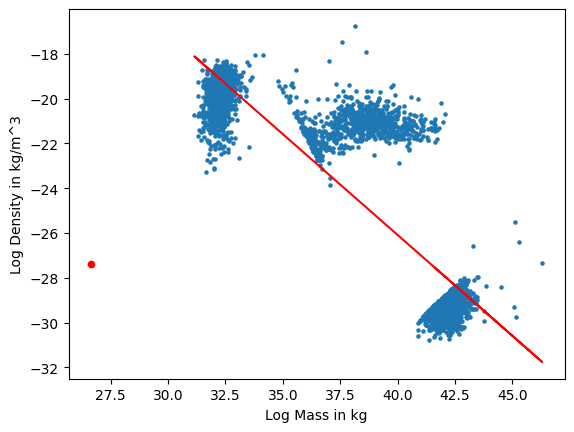

 
-0.8997 x + 9.903


In [ ]:

def calculate_stats(df):
    grouped = df.groupby('PType')
    result = grouped.agg({'Mass(Kg)': ['count', 'mean'], 'Radius(m)': 'mean'})
    print(result)

calculate_stats(df)

df['logMass'] = np.log10(df['Mass(Kg)'])
plt.scatter(df['logMass'], df['density'], s=5)
plt.xlabel('Log Mass in kg')
plt.ylabel('Log Density in kg/m^3')


z = np.polyfit(df['logMass'], df['density'], 1)
p = np.poly1d(z)
plt.plot(df['logMass'], p(df['logMass']), color='r', label='Trend Line')
plt.scatter([np.log10(4.44654332211e26)], [np.log10(4.0732e-28)], s = 20, color = "red")
y_pred = p(df['logMass'])
y_mean = np.mean(df['density'])
ss_total = np.sum((df['density'] - y_mean) ** 2)
ss_residual = np.sum((df['density'] - y_pred) ** 2)
r_squared = 1 - (ss_residual / ss_total)
print("R-Squared :" +str(r_squared))
plt.show()

print(p)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fdc13804-8e9e-42b5-b07c-64788a4e4ff3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>